In [1]:
%matplotlib inline

### Imports

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

## Creating training dataset manually

<ul>
    <li>We are going to create a data frame having two columns <b>x</b> and <b>e</b> </li>
    <li><b>x</b> is a random number sequence following <i>uniform</i> probability distribution</li>
    <li><b>e</b> is a random number sequance following <i>normal</i> probability distribution</li>
</ul>

Creating raw data using dictionary of numpy array

In [3]:
raw_data = {}
raw_data['x'] = np.random.uniform(low = -10, high = 10, size = 1000)
raw_data['e'] = np.random.normal(loc = 0.0, scale = 2.0, size = 1000)

Converting raw data to pandas dataframe

In [4]:
data = pd.DataFrame(raw_data)

In [5]:
display(data.head())

,x,e
0,-4.554645,0.548733
1,5.729415,-0.240194
2,7.619809,0.709531
3,6.081323,-2.118752
4,0.731170,0.699733


## Creating mathematical model

We are going to add a column <b>y</b> in dataframe that follow some mathematical expression as 

\begin{equation}
    y = f(x) + \epsilon
\end{equation}

\begin{equation}
    y = 10 - 5 \exp\left(-\frac{x}{5}\right) + \epsilon
\end{equation}

In [6]:
data.eval('y = 10 - 5 * exp(-x/5) + e', inplace = True)

## Creating Neural Network with one layer

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [8]:
callback = model.fit(x = data[['x']].values, y = data[['y']].values, batch_size = 64, epochs = 2000, verbose = 0)

## Creating prediction dataset

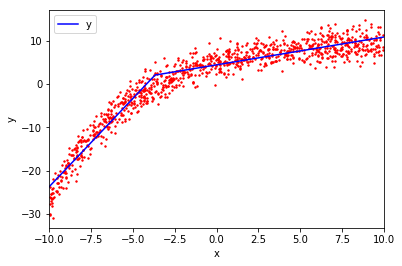

In [9]:
raw_data_predict = {}
raw_data_predict['x'] = np.linspace(start = -10, stop = 10, num = 20 * 500 + 1)
data_predict = pd.DataFrame(raw_data_predict)

predicted_val = model.predict(data_predict[['x']].values)

predicted_df = pd.DataFrame(predicted_val, columns = ['y'])

result = pd.merge(data_predict, predicted_df, left_index = True, right_index = True)

ax_ = data.plot.scatter(x = 'x', y = 'y', s = 2, color = 'red')
ax_ = result.plot(x = 'x', y = 'y', color = 'blue', ax = ax_)

## Iteration 2

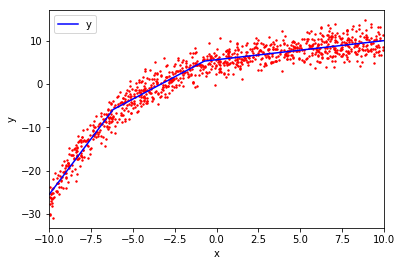

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(3, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

callback = model.fit(x = data[['x']].values, y = data[['y']].values, batch_size = 64, epochs = 2000, verbose = 0)

raw_data_predict = {}
raw_data_predict['x'] = np.linspace(start = -10, stop = 10, num = 20 * 500 + 1)
data_predict = pd.DataFrame(raw_data_predict)

predicted_val = model.predict(data_predict[['x']].values)

predicted_df = pd.DataFrame(predicted_val, columns = ['y'])

result = pd.merge(data_predict, predicted_df, left_index = True, right_index = True)

ax_ = data.plot.scatter(x = 'x', y = 'y', s = 2, color = 'red')
ax_ = result.plot(x = 'x', y = 'y', color = 'blue', ax = ax_)

## Iteration 3

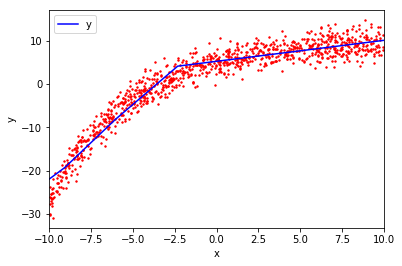

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

callback = model.fit(x = data[['x']].values, y = data[['y']].values, batch_size = 64, epochs = 2000, verbose = 0)

raw_data_predict = {}
raw_data_predict['x'] = np.linspace(start = -10, stop = 10, num = 20 * 500 + 1)
data_predict = pd.DataFrame(raw_data_predict)

predicted_val = model.predict(data_predict[['x']].values)

predicted_df = pd.DataFrame(predicted_val, columns = ['y'])

result = pd.merge(data_predict, predicted_df, left_index = True, right_index = True)

ax_ = data.plot.scatter(x = 'x', y = 'y', s = 2, color = 'red')
ax_ = result.plot(x = 'x', y = 'y', color = 'blue', ax = ax_)

## Iteration 4

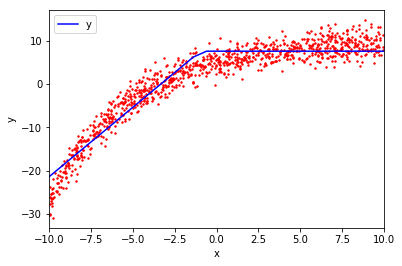

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(2, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

callback = model.fit(x = data[['x']].values, y = data[['y']].values, batch_size = 100, epochs = 2000, verbose = 0)

raw_data_predict = {}
raw_data_predict['x'] = np.linspace(start = -10, stop = 10, num = 20 * 500 + 1)
data_predict = pd.DataFrame(raw_data_predict)

predicted_val = model.predict(data_predict[['x']].values)

predicted_df = pd.DataFrame(predicted_val, columns = ['y'])

result = pd.merge(data_predict, predicted_df, left_index = True, right_index = True)

ax_ = data.plot.scatter(x = 'x', y = 'y', s = 2, color = 'red')
ax_ = result.plot(x = 'x', y = 'y', color = 'blue', ax = ax_)